In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
acc_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex7/openACC/output"
os.listdir(acc_path)

['8192', '16384', '2048', '30000', '4096']

In [3]:
def read_all_times(dir_path):
    tot_time = []
    calc_time = []
    comm_time = []
    copy_time = []
    for file in os.listdir(dir_path):
    # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = dir_path + "/" + file 
            name = file.split("_")
            with open(file_path, 'r') as f:
                new_line = 0
                for line in f.readlines():
                    t = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                    if t:
                        if (new_line==0):
                            tot_time.append((int(name[0]),float(t[0])))
                            new_line += 1
                        elif (new_line==1):
                            comm_time.append((int(name[0]),float(t[0])))
                            new_line += 1
                        elif (new_line==2):
                            calc_time.append((int(name[0]),float(t[0])))  
                            new_line += 1
                        else:
                            copy_time.append((int(name[0]),float(t[0])))
                            new_line += 1
    tot_time.sort()
    calc_time.sort()
    comm_time.sort()
    copy_time.sort()
    
    procs = []
    t_tot = []
    t_calc = []
    t_comm = []
    t_copy = []
    
    for x in tot_time:
        a,b = x
        procs.append(a)
        t_tot.append(b)
    for x in calc_time:
        a,b = x
        t_calc.append(b)
    for x in comm_time:
        a,b = x
        t_comm.append(b)
    for x in copy_time:
        a,b = x
        t_copy.append(b)
        
    return procs, t_tot, t_calc, t_comm, t_copy

In [4]:
def make_plots_times(title, labels, xtitle, commTime, calcTime, copyTime):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.bar(x, commTime, width, bottom=calcTime, label='CommTime')
    rects2 = ax.bar(x, calcTime, width, label='CalcTime')
    rects3 = ax.bar(x, copyTime, width, bottom=commTime+calcTime, label='CopyTime')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time')
    ax.set_xlabel(xtitle)
    ax.set_title(title ) 
    ax.set_xticks(x)
    ax.legend()
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()

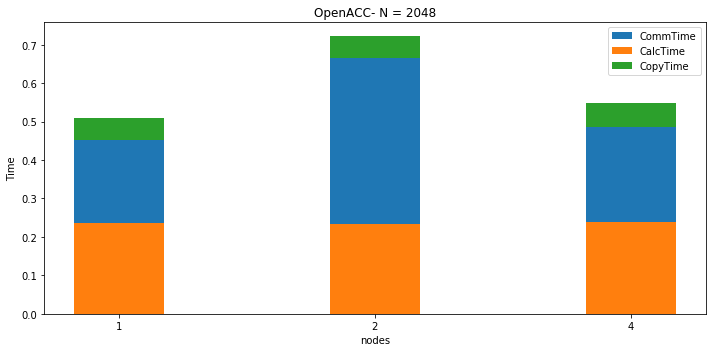

In [5]:
procs, tot_time, calc_time, comm_time, copy_time = read_all_times(acc_path+"/2048")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
copy_time = np.asarray(copy_time)
make_plots_times("OpenACC- N = 2048", procs, 'nodes', comm_time, calc_time, copy_time)

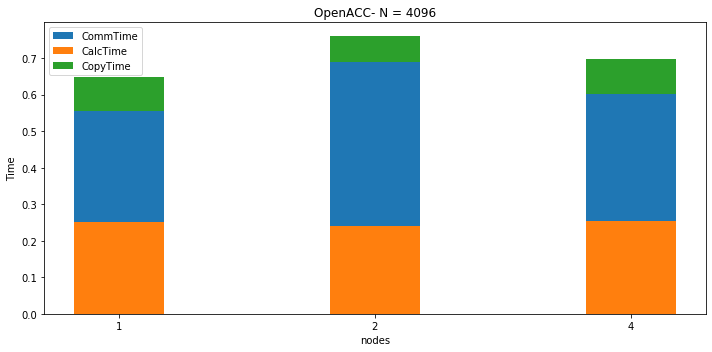

In [6]:
procs, tot_time, calc_time, comm_time, copy_time = read_all_times(acc_path+"/4096")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
copy_time = np.asarray(copy_time)
make_plots_times("OpenACC- N = 4096", procs, 'nodes', comm_time, calc_time, copy_time)

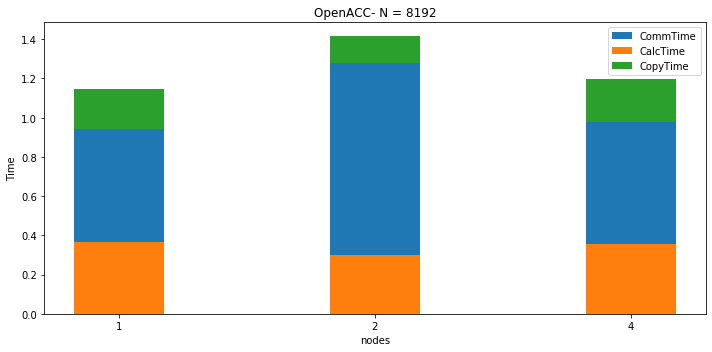

In [7]:
procs, tot_time, calc_time, comm_time, copy_time = read_all_times(acc_path+"/8192")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
copy_time = np.asarray(copy_time)
make_plots_times("OpenACC- N = 8192", procs, 'nodes', comm_time, calc_time, copy_time)

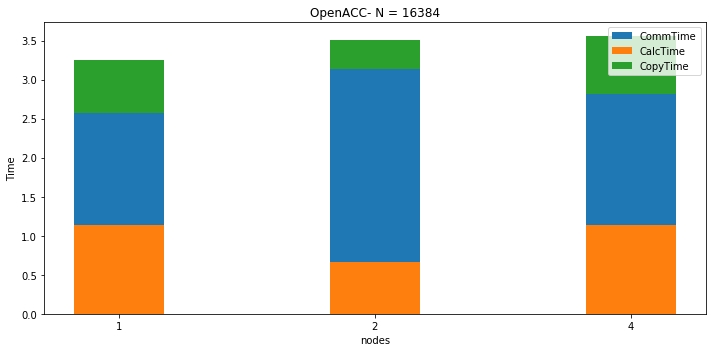

In [8]:
procs, tot_time, calc_time, comm_time, copy_time = read_all_times(acc_path+"/16384")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
copy_time = np.asarray(copy_time)
make_plots_times("OpenACC- N = 16384", procs, 'nodes', comm_time, calc_time, copy_time)

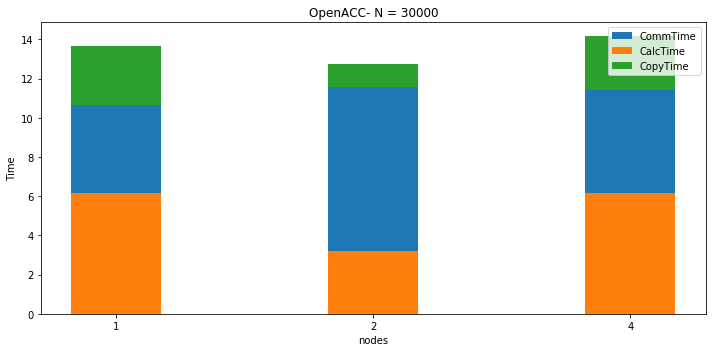

In [9]:
procs, tot_time, calc_time, comm_time, copy_time = read_all_times(acc_path+"/30000")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
copy_time = np.asarray(copy_time)
make_plots_times("OpenACC- N = 30000", procs, 'nodes', comm_time, calc_time, copy_time)